In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf

In [3]:
import os
filelist = os.listdir("savedata")
lst = []
for ijk in filelist:
#     frame = pd.read_csv(f"/home/technology/vikram/ISV_detection_LSTMs/new_about_extraction/savedata/{ijk}")
    with open(f"savedata/{ijk}",'r') as fl:
        text = fl.readlines()
        text = " ".join(text)
    
    lst.append([ijk.replace("_",".").replace(".txt",""),text])
#     df = df.append(list(frame).insert(0,str(ijk.replace("_",".").replace(".txt",""))))
df_text = pd.DataFrame(lst,columns = ["domains","text"])

In [3]:
df1=pd.read_excel("2k_sample_b2b_b2c.xlsx")

In [4]:
df1 = df1.rename(columns={'Website': 'domains'})

In [5]:
final_df=pd.merge(df_text,df1,on='domains')
final_df

,domains,text,Email Domain,Business Model
0,www.umcelpaso.org,umc paso university medical center paso welcom...,umcelpaso.org,B2C
1,www.merithall.com,staffing recruitment agencies detroit merithal...,merithall.com,B2C
2,www.intd.com,heartland express giving truck drivers best pa...,intd.com,B2B
3,www.edgetherapeutics.com,site configured found site looking found domai...,edgetherapeutics.com,B2B
4,www.backchecked.com,urls looking,backchecked.com,B2B
...,...,...,...,...
3829,www.marketmuse.com,content planning optimization software marketm...,marketmuse.com,B2B
3830,www.modernstorytellers.com,haberman mission based marketing communication...,modernstorytellers.com,B2B
3831,www.startel.com,contact center software startel com follow fol...,startel.com,B2B
3832,www.donleefarms.com,meat meatless plant based burgers bowls lee fa...,donleefarms.com,B2C


In [6]:
final_df.text[0]

'umc paso university medical center paso welcome toggle navigation main number find doctor find doctor verify provider privileges find facility medical services digestive health center cardiology emergency geriatrics imaging services infusion services lab services scherr legate level trauma center maternity men health neurosciences orthopedics outpatient clinics outpatient pharmacy pediatrics border pediatrics rehabilitation spine center neurosurgery surgery women health vascular endovascular surgery west texas regional poison center patients visitors billing insurance hours visitation cafeteria menus find facility medical records prescriptions volunteer hospital community programs leadership meetings region rhp legal medical staff services compliance main number search careers business umc contact api staffing scheduling login myhealthep myhealthep self enroll neighborhood healthcare centers volunteer make payment find doctor find doctor verify provider privileges find facility medica

In [7]:
final_df['length'] = final_df.text.apply(lambda x: len(str(x).split()))

In [8]:
b2b_df = final_df[(final_df['Business Model'] == "B2C" )& (final_df['length'] <  3051 )]
b2c_df = final_df[(final_df['Business Model'] == "B2B" )& (final_df['length'] <  1793 )]
new_df = b2b_df.append(b2c_df)

/tmp/ipykernel_8288/1322955384.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = b2b_df.append(b2c_df)


In [9]:
import nltk
import re
import string
nltk.download('stopwords')
stopwords = list(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def normalize(col):
    for i in range(len(col)):
        lm=col[i].lower().split(' ')
    return lm


def stopwords_removal(stopwords,review_split):
    stop_wrods_remove=[]
    for i in range(len(review_split)):
        stop_wrods_remove.append([i for i in review_split[i] if i not in stopwords])
    return stop_wrods_remove


def number_removed(stopword_rem):
    joined=[]
    for i in range(len(stopword_rem)):
        joined.append(' '.join(stopword_rem[i]))
    number_removed=[]
    for i in range(len(joined)):
        number_removed.append(re.sub(r'[0-9]+',r' ',joined[i]))
    removed=[]
    for i in range(len(number_removed)):
        removed.append(re.sub(r'  ',r' ',number_removed[i]))
    punct=[]
    for i in range(len(removed)):
        punct.append([i for i in removed[i] if i not in [i for i in string.punctuation]])
    jo=[]
    for i in range(len(punct)):
        jo.append(''.join(punct[i]))
    return jo

In [11]:
new_df = new_df.reset_index()

In [12]:
df_split=new_df[['text']].apply(normalize,axis=1)

In [13]:
stopword_rem=stopwords_removal(stopwords,df_split)

In [14]:
removed_number=number_removed(stopword_rem)

In [15]:
new=[]
for i in range(len(removed_number)):
    new.append(removed_number[i].split(','))

In [16]:
new_df['text_mining']=new

In [17]:
new_df = new_df.rename(columns={'Business Model': 'tags'})

In [18]:
new_df = new_df[['text','text_mining', 'tags']]

In [19]:
new_df["tags"] = new_df["tags"].astype('category')
new_df["tags_id"] = new_df["tags"].cat.codes
new_df.head()

,text,text_mining,tags,tags_id
0,staffing recruitment agencies detroit merithal...,[staffing recruitment agencies detroit meritha...,B2C,1
1,home olmsted falls city schools skip main cont...,[home olmsted falls city schools skip main con...,B2C,1
2,,[],B2C,1
3,,[],B2C,1
4,online full part time national university virt...,[online full part time national university vir...,B2C,1


In [20]:
new_df.head()

,text,text_mining,tags,tags_id
0,staffing recruitment agencies detroit merithal...,[staffing recruitment agencies detroit meritha...,B2C,1
1,home olmsted falls city schools skip main cont...,[home olmsted falls city schools skip main con...,B2C,1
2,,[],B2C,1
3,,[],B2C,1
4,online full part time national university virt...,[online full part time national university vir...,B2C,1


In [21]:
vocab_size = 20000  # Only consider the top 20K words
max_len = 2000  # Maximum review (text) size in words

In [22]:
new_df['textt'] = [','.join(map(str, l)) for l in new_df['text_mining']]

In [23]:
len(set((str(new_df.text.to_list())).split()))

62176

In [24]:
numeric_dataset = tf.data.Dataset.from_tensor_slices((new_df.text, new_df['tags_id']))

2022-04-22 10:58:16.818629: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-22 10:58:16.818658: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-22 10:58:16.818676: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (IAAHMLAP099): /proc/driver/nvidia/version does not exist
2022-04-22 10:58:16.820424: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
BATCH_SIZE = 64
numeric_batches = numeric_dataset.shuffle(1000).batch(BATCH_SIZE)

In [26]:
for example, label in numeric_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b'staffing recruitment agencies detroit merithall skip main content careers search jobs people place hiring process client services faqs story team testimonials blog contact menu careers search jobs people place hiring process client services faqs story team testimonials blog contact great jobs exceptional people metro detroit premier staffing workforce solutions provider find next opportunity find next employee industries serve merithall full service staffing agency detroit put expertise experience work today manufacturing landscaping construction services solutions skilled trades recruitment long term staffing seasonal staffing find great job today looking new opportunity merithall recruitment agency detroit matches people jobs construction landscaping manufacturing find job right right apply online search jobs location ferndale hamtramck livonia livonia milford plymouth taylor troy industry automotive industry construction driving facility maintenance forklift operator genera

In [27]:
BUFFER_SIZE = 3000
BATCH_SIZE = 64

In [28]:
def get_dataset_partitions_tf(ds, ds_size, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=5000):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=24)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [29]:
len(numeric_dataset)

2872

In [30]:

train_ds, val_ds, test_ds = get_dataset_partitions_tf(numeric_dataset, 2872)

In [31]:
train_ds

<TakeDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int8, name=None))>

In [32]:
train_dataset = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_ds.batch(BATCH_SIZE)

In [33]:
VOCAB_SIZE = 62000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [34]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'services', 'contact', 'care', 'new', 'home',
       'health', 'service', 'team', 'solutions', 'learn', 'business',
       'careers', 'support', 'information', 'company', 'products', 'news',
       'center'], dtype='<U62')

In [37]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [36]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [38]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True, True]


In [39]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [40]:
history = model.fit(train_dataset, epochs=25,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/25
36/36 [==============================] - 130s 3s/step - loss: 0.6925 - accuracy: 0.5085 - val_loss: 0.6922 - val_accuracy: 0.4826
Epoch 2/25
36/36 [==============================] - 109s 3s/step - loss: 0.6914 - accuracy: 0.5059
Epoch 3/25
36/36 [==============================] - 110s 3s/step - loss: 0.6891 - accuracy: 0.5020
Epoch 4/25
36/36 [==============================] - 102s 3s/step - loss: 0.6814 - accuracy: 0.4963
Epoch 5/25
36/36 [==============================] - 98s 3s/step - loss: 0.6018 - accuracy: 0.5694
Epoch 6/25
36/36 [==============================] - 118s 3s/step - loss: 0.4708 - accuracy: 0.7849
Epoch 7/25
36/36 [==============================] - 111s 3s/step - loss: 0.4128 - accuracy: 0.8180
Epoch 8/25
36/36 [==============================] - 110s 3s/step - loss: 0.3427 - accuracy: 0.8398
Epoch 9/25
36/36 [==============================] - 101s 3s/step - loss: 0.3021 - accuracy: 0.8655
Epoch 10/25
36/36 [==============================] - 96s 3s/step - l

In [41]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

5/5 [==============================] - 2s 360ms/step - loss: 0.0916 - accuracy: 0.9271
Test Loss: 0.09161242842674255
Test Accuracy: 0.9270833134651184


In [45]:
pip install pyyaml h5py

Note: you may need to restart the kernel to use updated packages.


In [47]:
!mkdir -p saved_model
model.save('saved_model/my_model')

2022-04-22 12:38:07.695446: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [50]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

my_model
assets	keras_metadata.pb  saved_model.pb  variables


In [51]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

2022-04-22 12:38:53.826010: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-04-22 12:38:54.302179: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-04-22 12:38:54.602399: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-04-22 12:38:54.740389: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-04-22 12:38:56.145394: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_sh

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, None, 64)          3291008   
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [61]:
test_loss, test_acc = new_model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

5/5 [==============================] - 4s 353ms/step - loss: 0.0752 - accuracy: 0.9375
Test Loss: 0.0751938670873642
Test Accuracy: 0.9375


(0.0, 0.7226751197129488)

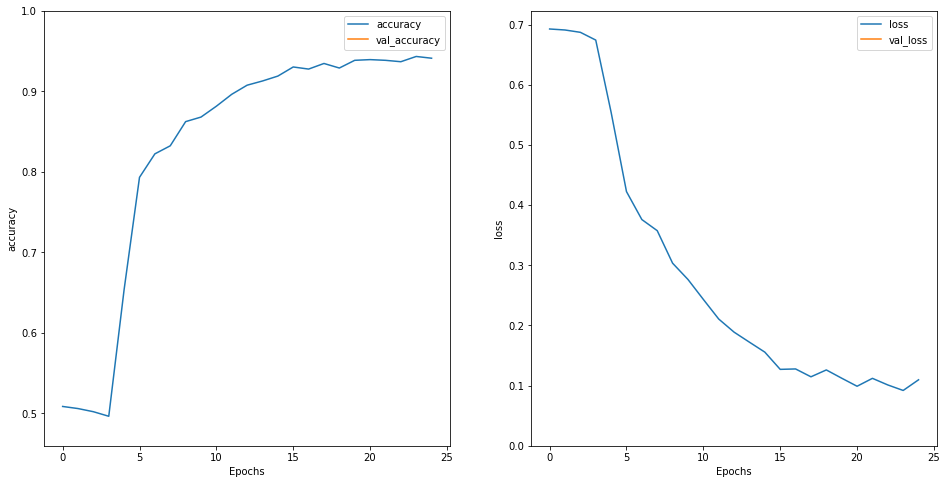

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [111]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [112]:
final_df['Business Model'][1]

'B2C'

In [113]:
final_df.head(2)

,domains,text,Email Domain,Business Model,length
0,www.umcelpaso.org,umc paso university medical center paso welcom...,umcelpaso.org,B2C,22117
1,www.merithall.com,staffing recruitment agencies detroit merithal...,merithall.com,B2C,1417


In [52]:
import os
filelist = os.listdir("test1")
lst = []
for ijk in filelist:
#     frame = pd.read_csv(f"/home/technology/vikram/ISV_detection_LSTMs/new_about_extraction/savedata/{ijk}")
    with open(f"test1/{ijk}",'r') as fl:
        text = fl.readlines()
        text = " ".join(text)
    
    lst.append([ijk.replace("_",".").replace(".txt",""),text])
#     df = df.append(list(frame).insert(0,str(ijk.replace("_",".").replace(".txt",""))))
df_text = pd.DataFrame(lst,columns = ["domains","text"])

In [53]:
df_text = df_text.replace(r'^\s*$', np.nan, regex=True)

In [54]:
df_text

,domains,text
0,lorencook.com,air moving experts fans blowers lab exhaust en...
1,icueyewear.com,stylish reading glasses men women icu eyewear ...
2,oldbrickfurniture.com,old brick furniture mattress store old brick f...
3,ciscofishingsystemsltd.com,fishing trolling equipment adjustable rod hold...
4,adi.com,applied dynamics international applied dynamic...
...,...,...
878,riftrecon.com,found found resource requested could found ser...
879,shoyoroll.com,shoyoroll skip content shop feed account podca...
880,mexicaliblues.com,responsibly sourced hippie clothing boho decor...
881,rjcomponents.com,NaN


In [55]:
df_text.dropna(inplace=True)

In [56]:
prediction = []
for index, row in df_text.iterrows():
    predictions = new_model.predict(np.array([row['text']]))
    if predictions >= 0.0:
        x = 'B2C'
        prediction.append(x)
    else:
        x = 'B2B'
        prediction.append(x)
    

In [59]:
df_text['prediction'] = pd.Series(prediction)

In [60]:
df_text.to_excel("prediction9.xlsx")

In [ ]:
len(prediction)

In [ ]:
df_text

In [58]:
len(prediction)

876